### Simple Perceptron ( basic code )

In [1]:
import numpy as np

X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 1, 1, 1])

weights = np.zeros(X.shape[1])
bias = 0
learning_rate = 0.1
epochs = 10

# Training
for _ in range(epochs):
    for i in range(len(X)):
        linear_output = np.dot(X[i], weights) + bias
        
        y_pred = 1 if linear_output >= 0 else 0
        
        error = y[i] - y_pred
        weights += learning_rate * error * X[i]
        bias += learning_rate * error

print("Final weights:", weights)
print("Final bias:", bias)

for i in range(len(X)):
    output = np.dot(X[i], weights) + bias
    y_pred = 1 if output >= 0 else 0
    print(f"Input: {X[i]} → Output: {y_pred}")


Final weights: [0.1 0.1]
Final bias: -0.1
Input: [0 0] → Output: 0
Input: [0 1] → Output: 1
Input: [1 0] → Output: 1
Input: [1 1] → Output: 1


### Implementing a Perceptron Classifier with Scikit-learn

In [4]:
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = load_iris()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)

# Create a Perceptron object with a learning rate of 0.1
perceptron = Perceptron(alpha=0.1)

# Train the Perceptron on the training data
perceptron.fit(X_train, y_train)

# Use the trained Perceptron to make predictions on the testing data
y_pred = perceptron.predict(X_test)

# Evaluate the accuracy of the Perceptron
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8


### Perceptron with activation Function with AND, OR (linear data), XOR (non linear data)

### ( i ) AND Operation

Predictions: [0 0 0 1]
Weights: [0.2 0.1]
Bias: -0.20000000000000004


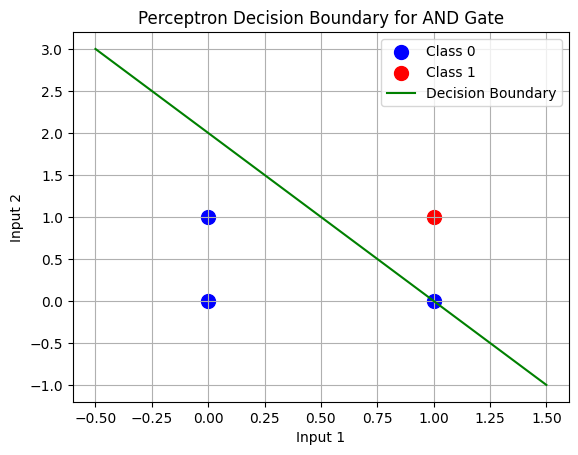

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Simple Perceptron
class Perceptron:
    def __init__(self, learning_rate=0.1, n_iters=100):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self.activation_func(linear_output)
                update = self.lr * (y[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_func(linear_output)

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)


# AND Gate dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 0, 0, 1])

# Train perceptron
p = Perceptron(learning_rate=0.1, n_iters=10)
p.fit(X, y)

# Predictions
pred = p.predict(X)
print("Predictions:", pred)
print("Weights:", p.weights)
print("Bias:", p.bias)

# Plot points
for i in range(len(X)):
    if y[i] == 0:
        plt.scatter(X[i][0], X[i][1], color='blue', s=100, label='Class 0' if i == 0 else "")
    else:
        plt.scatter(X[i][0], X[i][1], color='red', s=100, label='Class 1' if i == 3 else "")

# Decision boundary: w1*x1 + w2*x2 + b = 0
x1 = np.linspace(-0.5, 1.5, 100)
x2 = -(p.weights[0] * x1 + p.bias) / p.weights[1]
plt.plot(x1, x2, color='green', label='Decision Boundary')

plt.title("Perceptron Decision Boundary for AND Gate")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.legend()
plt.grid(True)
plt.show()


### ( ii ) OR GATE

Predictions: [0 1 1 1]
Weights: [0.1 0.1]
Bias: -0.1


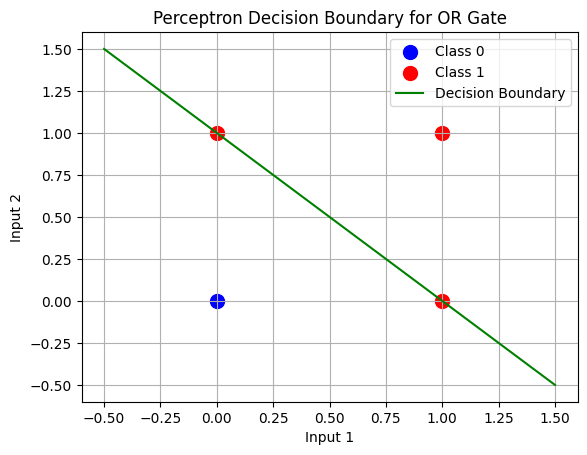

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Simple Perceptron
class Perceptron:
    def __init__(self, learning_rate=0.1, n_iters=100):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self.activation_func(linear_output)
                update = self.lr * (y[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_func(linear_output)

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)


# OR Gate dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 1, 1, 1])

# Train perceptron
p = Perceptron(learning_rate=0.1, n_iters=10)
p.fit(X, y)

# Predictions
pred = p.predict(X)
print("Predictions:", pred)
print("Weights:", p.weights)
print("Bias:", p.bias)

# Plotting
for i in range(len(X)):
    if y[i] == 0:
        plt.scatter(X[i][0], X[i][1], color='blue', s=100, label='Class 0' if i == 0 else "")
    else:
        plt.scatter(X[i][0], X[i][1], color='red', s=100, label='Class 1' if i == 1 else "")

# Decision boundary: w1*x1 + w2*x2 + b = 0
x1 = np.linspace(-0.5, 1.5, 100)
x2 = -(p.weights[0] * x1 + p.bias) / p.weights[1]
plt.plot(x1, x2, color='green', label='Decision Boundary')

plt.title("Perceptron Decision Boundary for OR Gate")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.legend()
plt.grid(True)
plt.show()


### ( iii ) XOR GATE

Predictions for XOR Gate: [1 1 0 0]
Actual: [0 1 1 0]


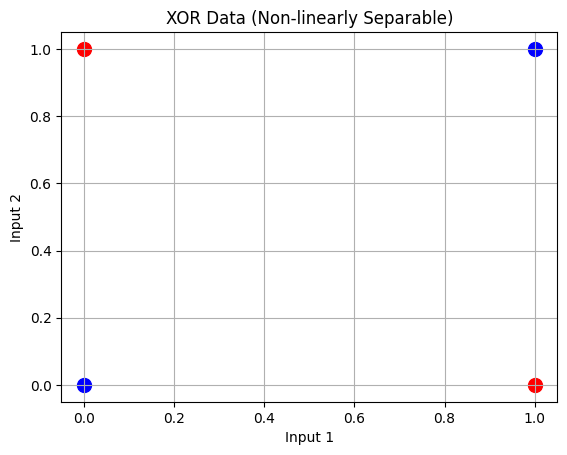

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Simple Perceptron
class Perceptron:
    def __init__(self, learning_rate=0.1, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self.activation_func(linear_output)
                update = self.lr * (y[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_func(linear_output)

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)


# XOR Gate dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 1, 1, 0])

# Train the perceptron
p = Perceptron(learning_rate=0.1, n_iters=10)
p.fit(X, y)
predictions = p.predict(X)

print("Predictions for XOR Gate:", predictions)
print("Actual:", y)

# Visualization
for i in range(len(X)):
    color = 'red' if y[i] == 1 else 'blue'
    plt.scatter(X[i][0], X[i][1], color=color, s=100)
plt.title("XOR Data (Non-linearly Separable)")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.grid(True)
plt.show()

### Feedforward neural network with a single hidden layer, but it is not a trainable MLP

In [2]:
import numpy as np

import numpy as np

# --- Activation Function ---
def sigmoid(x):
    """Sigmoid activation function: f(x) = 1 / (1 + e^(-x))"""
    return 1 / (1 + np.exp(-x))

# --- Neuron Class ---
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs):
        """Compute neuron output using weights, bias, and activation function."""
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)
        
class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)
  Each neuron has the same weights and bias:
    - w = [0, 1]
    - b = 0
  '''
  def __init__(self):
    weights = np.array([0, 1])
    bias = 0

# The Neuron class here is from the previous section
    self.h1 = Neuron(weights, bias)
    self.h2 = Neuron(weights, bias)
    self.o1 = Neuron(weights, bias)

  def feedforward(self, x):
    out_h1 = self.h1.feedforward(x)
    out_h2 = self.h2.feedforward(x)

    # The inputs for o1 are the outputs from h1 and h2
    out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))

    return out_o1

network = OurNeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x)) # 0.7216325609518421


0.7216325609518421


### Implement a Multilayer Perceptron (MLP) with a single hidden layer (XOR Problem)

In [1]:
import numpy as np

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# MLP class
class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1, n_iters=10000):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.lr = learning_rate
        self.n_iters = n_iters
        
        # Initialize weights
        self.W1 = np.random.randn(self.input_size, self.hidden_size) * 0.1
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size) * 0.1
        self.b2 = np.zeros((1, self.output_size))
    
    # Forward pass
    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = sigmoid(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        return self.A2
    
    # Backward pass
    def backward(self, X, y, output):
        m = X.shape[0]
        
        # Output layer error
        dZ2 = output - y
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        
        # Hidden layer error
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * sigmoid_derivative(self.A1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m
        
        # Update weights
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
    
    # Training
    def fit(self, X, y):
        for i in range(self.n_iters):
            output = self.forward(X)
            self.backward(X, y, output)
            if (i+1) % 1000 == 0:
                loss = np.mean((y - output)**2)
                print(f"Iteration {i+1}, Loss: {loss:.4f}")
    
    # Prediction
    def predict(self, X):
        output = self.forward(X)
        return np.round(output)

# Example usage
if __name__ == "__main__":
    # XOR problem
    X = np.array([[0,0],[0,1],[1,0],[1,1]])
    y = np.array([[0],[1],[1],[0]])

    # Create MLP with 4 neurons in hidden layer
    mlp = MLP(input_size=2, hidden_size=4, output_size=1, learning_rate=0.5, n_iters=10000)
    mlp.fit(X, y)

    predictions = mlp.predict(X)
    print("Predictions:")
    print(predictions)

Iteration 1000, Loss: 0.2500
Iteration 2000, Loss: 0.2449
Iteration 3000, Loss: 0.0020
Iteration 4000, Loss: 0.0002
Iteration 5000, Loss: 0.0001
Iteration 6000, Loss: 0.0000
Iteration 7000, Loss: 0.0000
Iteration 8000, Loss: 0.0000
Iteration 9000, Loss: 0.0000
Iteration 10000, Loss: 0.0000
Predictions:
[[0.]
 [1.]
 [1.]
 [0.]]


### MLP on MNIST dataset and display its train and test data score. 

In [4]:
import numpy as np
import sklearn.datasets as skl_data
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# --- 1. Load MNIST dataset ---
data, labels = skl_data.fetch_openml('mnist_784', version=1, return_X_y=True)

# Convert labels from string to integer
labels = labels.astype(int)

# Normalize pixel values to [0,1]
data = data / 255.0

print("Data shape:", data.shape)
print("Labels shape:", labels.shape)

# --- 2. Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.10, random_state=42, stratify=labels
)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# --- 3. Create MLP classifier ---
# Single hidden layer with 175 neurons
mlp = MLPClassifier(
    hidden_layer_sizes=(175,),  
    max_iter=200,               
    verbose=1,
    random_state=1
)

# --- 4. Train MLP ---
mlp.fit(X_train, y_train)

# --- 5. Evaluate ---
print("Training set accuracy:", mlp.score(X_train, y_train))
print("Testing set accuracy:", mlp.score(X_test, y_test))

# --- 6. Predict a single digit ---
index = 346
test_digit = X_test.iloc[index].to_numpy().reshape(1, 784)  # use .iloc for row
test_digit_prediction = mlp.predict(test_digit)[0]

print("Predicted value:", test_digit_prediction)
print("Actual value:", y_test.iloc[index])


/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Data shape: (70000, 784)
Labels shape: (70000,)
X_train shape: (63000, 784)
X_test shape: (7000, 784)
Iteration 1, loss = 0.36947524
Iteration 2, loss = 0.16403673
Iteration 3, loss = 0.11692557
Iteration 4, loss = 0.09073399
Iteration 5, loss = 0.07360339
Iteration 6, loss = 0.06079920
Iteration 7, loss = 0.05128877
Iteration 8, loss = 0.04315299
Iteration 9, loss = 0.03573000
Iteration 10, loss = 0.03089252
Iteration 11, loss = 0.02634015
Iteration 12, loss = 0.02260335
Iteration 13, loss = 0.01888108
Iteration 14, loss = 0.01641133
Iteration 15, loss = 0.01391740
Iteration 16, loss = 0.01179918
Iteration 17, loss = 0.00961449
Iteration 18, loss = 0.00847527
Iteration 19, loss = 0.00719428
Iteration 20, loss = 0.00637856
Iteration 21, loss = 0.00533186
Iteration 22, loss = 0.00474905
Iteration 23, loss = 0.00577574
Iteration 24, loss = 0.00586461
Iteration 25, loss = 0.00325895
Iteration 26, loss = 0.00273516
Iteration 27, loss = 0.00203375
Iteration 28, loss = 0.00176265
Iteration 2

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


### Find the relation between learning rate and loss (or) number  of iterations and loss.

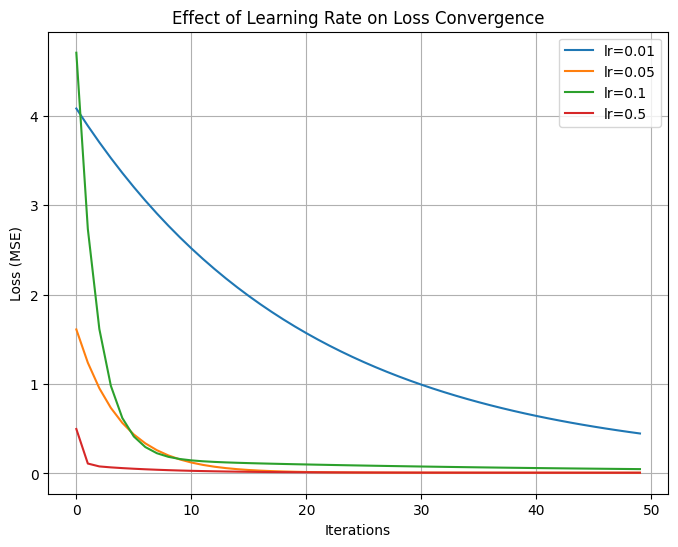

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# --- Synthetic dataset (linear problem) ---
np.random.seed(42)
X = np.random.rand(100, 1)  # 100 samples, 1 feature
y = 2 * X.squeeze() + 1 + 0.1 * np.random.randn(100)  # y = 2x + 1 + noise
y = y.reshape(-1, 1)

# --- Simple linear neuron ---
class SimpleNeuron:
    def __init__(self):
        self.w = np.random.randn(1, 1)
        self.b = 0

    def forward(self, X):
        return np.dot(X, self.w) + self.b

    def compute_loss(self, y_true, y_pred):
        return np.mean((y_true - y_pred)**2)  # MSE

    def train(self, X, y, lr, n_iters):
        losses = []
        for _ in range(n_iters):
            y_pred = self.forward(X)
            loss = self.compute_loss(y, y_pred)
            losses.append(loss)

            # Gradient descent
            dw = np.mean(2 * (y_pred - y) * X)
            db = np.mean(2 * (y_pred - y))
            self.w -= lr * dw
            self.b -= lr * db
        return losses

# --- Compare different learning rates ---
learning_rates = [0.01, 0.05, 0.1, 0.5]
n_iters = 50

plt.figure(figsize=(8,6))
for lr in learning_rates:
    neuron = SimpleNeuron()
    losses = neuron.train(X, y, lr=lr, n_iters=n_iters)
    plt.plot(range(n_iters), losses, label=f'lr={lr}')

plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title("Effect of Learning Rate on Loss Convergence")
plt.legend()
plt.grid(True)
plt.show()


### Find the relation between number of neurons with learning rate and iterations. 

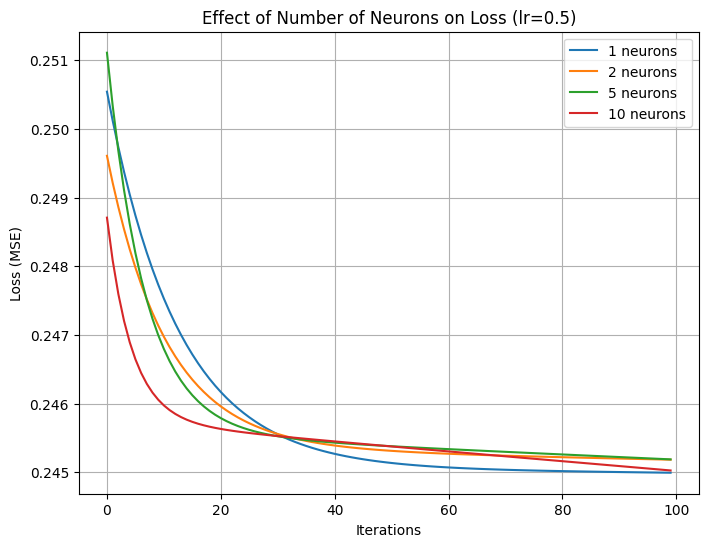

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 2)
y = (X[:,0] + X[:,1] > 1).astype(int).reshape(-1,1)  # simple OR logic

# Activation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Simple single hidden layer MLP
def train_mlp(X, y, hidden_neurons, lr=0.1, n_iters=100):
    n_input = X.shape[1]
    n_hidden = hidden_neurons
    n_output = 1

    # Initialize weights
    W1 = np.random.randn(n_input, n_hidden) * 0.1
    b1 = np.zeros((1, n_hidden))
    W2 = np.random.randn(n_hidden, n_output) * 0.1
    b2 = np.zeros((1, n_output))

    losses = []

    for _ in range(n_iters):
        # Forward
        Z1 = np.dot(X, W1) + b1
        A1 = sigmoid(Z1)
        Z2 = np.dot(A1, W2) + b2
        A2 = sigmoid(Z2)

        # Loss
        loss = np.mean((y - A2)**2)
        losses.append(loss)

        # Backprop
        dZ2 = (A2 - y) * sigmoid_derivative(A2)
        dW2 = np.dot(A1.T, dZ2) / X.shape[0]
        db2 = np.sum(dZ2, axis=0, keepdims=True) / X.shape[0]

        dA1 = np.dot(dZ2, W2.T)
        dZ1 = dA1 * sigmoid_derivative(A1)
        dW1 = np.dot(X.T, dZ1) / X.shape[0]
        db1 = np.sum(dZ1, axis=0, keepdims=True) / X.shape[0]

        # Update
        W1 -= lr * dW1
        b1 -= lr * db1
        W2 -= lr * dW2
        b2 -= lr * db2

    return losses

# Test different neuron counts
neuron_counts = [1, 2, 5, 10]
lr = 0.5
n_iters = 100

plt.figure(figsize=(8,6))
for n in neuron_counts:
    loss_curve = train_mlp(X, y, hidden_neurons=n, lr=lr, n_iters=n_iters)
    plt.plot(loss_curve, label=f'{n} neurons')

plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title(f"Effect of Number of Neurons on Loss (lr={lr})")
plt.legend()
plt.grid(True)
plt.show()